In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
synthetic_db = niidb.FMriActivationsDb('data/synthetic_data_mini.db')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in synthetic_db.all() if 'rest' not in b.task], 
                                                  mask='/home/zulqarnain/fmri_data/wholebrain.nii.gz', num_factors=3)

05/30/2020 22:38:29 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_1_task_2_stimulus_1.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:29 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_1_task_2_stimulus_2.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:29 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_1_task_2_stimulus_3.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:29 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_1_task_2_stimulus_4.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest

05/30/2020 22:38:32 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_5_task_2_stimulus_2.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:32 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_5_task_2_stimulus_3.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:32 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_5_task_2_stimulus_4.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:32 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_5_task_3_stimulus_1.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest

05/30/2020 22:38:35 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_9_task_2_stimulus_3.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:35 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_9_task_2_stimulus_4.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:35 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_9_task_3_stimulus_1.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/30/2020 22:38:35 Loading Nifti image /home/zulqarnain/fmri_data/synthetic_data_mini_zscored_blocked/nifti_files/subject_9_task_3_stimulus_2.nii with mask /home/zulqarnain/fmri_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest

In [7]:
losses = htfa.train(num_steps=250, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=9, checkpoint_steps=200,
                    blocks_filter=synthetic_db.inference_filter(training=True,held_out_tasks=['rest_1', 'rest_2', 'rest_3',
                                                                                                     'rest_4', 'rest_5', 'rest_6', 
                                                                                                     'rest_7', 'rest_8','rest_9']))

05/30/2020 22:38:37 [Epoch 1] (459ms) Posterior free-energy 3.26916608e+08
05/30/2020 22:38:37 Saving checkpoint...
05/30/2020 22:38:37 [Epoch 2] (337ms) Posterior free-energy 3.22166272e+08
05/30/2020 22:38:38 [Epoch 3] (331ms) Posterior free-energy 3.21237440e+08
05/30/2020 22:38:38 [Epoch 4] (332ms) Posterior free-energy 3.20070176e+08
05/30/2020 22:38:38 [Epoch 5] (332ms) Posterior free-energy 3.17156160e+08
05/30/2020 22:38:39 [Epoch 6] (329ms) Posterior free-energy 3.17618272e+08
05/30/2020 22:38:39 [Epoch 7] (331ms) Posterior free-energy 3.18028672e+08
05/30/2020 22:38:39 [Epoch 8] (334ms) Posterior free-energy 3.17287936e+08
05/30/2020 22:38:40 [Epoch 9] (331ms) Posterior free-energy 3.16844384e+08
05/30/2020 22:38:40 [Epoch 10] (333ms) Posterior free-energy 3.16315456e+08
05/30/2020 22:38:40 [Epoch 11] (334ms) Posterior free-energy 3.16476608e+08
05/30/2020 22:38:41 [Epoch 12] (332ms) Posterior free-energy 3.16347968e+08
05/30/2020 22:38:41 [Epoch 13] (333ms) Posterior free-en

05/30/2020 22:39:22 [Epoch 109] (449ms) Posterior free-energy 3.15880544e+08
05/30/2020 22:39:23 [Epoch 110] (443ms) Posterior free-energy 3.15897376e+08
05/30/2020 22:39:23 [Epoch 111] (443ms) Posterior free-energy 3.15884864e+08
05/30/2020 22:39:24 [Epoch 112] (442ms) Posterior free-energy 3.15907328e+08
05/30/2020 22:39:24 [Epoch 113] (453ms) Posterior free-energy 3.15888384e+08
05/30/2020 22:39:25 [Epoch 114] (477ms) Posterior free-energy 3.15887616e+08
05/30/2020 22:39:25 [Epoch 115] (468ms) Posterior free-energy 3.15894656e+08
05/30/2020 22:39:26 [Epoch 116] (434ms) Posterior free-energy 3.15887520e+08
05/30/2020 22:39:26 [Epoch 117] (450ms) Posterior free-energy 3.15895808e+08
05/30/2020 22:39:26 [Epoch 118] (447ms) Posterior free-energy 3.15883776e+08
05/30/2020 22:39:27 [Epoch 119] (448ms) Posterior free-energy 3.15901504e+08
05/30/2020 22:39:27 [Epoch 120] (443ms) Posterior free-energy 3.15886656e+08
05/30/2020 22:39:28 [Epoch 121] (464ms) Posterior free-energy 3.15906304e+08

05/30/2020 22:40:10 [Epoch 215] (442ms) Posterior free-energy 3.15890048e+08
05/30/2020 22:40:11 [Epoch 216] (452ms) Posterior free-energy 3.15885184e+08
05/30/2020 22:40:11 [Epoch 217] (445ms) Posterior free-energy 3.15886496e+08
05/30/2020 22:40:12 [Epoch 218] (432ms) Posterior free-energy 3.15891392e+08
05/30/2020 22:40:12 [Epoch 219] (445ms) Posterior free-energy 3.15888128e+08
05/30/2020 22:40:13 [Epoch 220] (451ms) Posterior free-energy 3.15889920e+08
05/30/2020 22:40:13 [Epoch 221] (459ms) Posterior free-energy 3.15885952e+08
05/30/2020 22:40:13 [Epoch 222] (460ms) Posterior free-energy 3.15887936e+08
05/30/2020 22:40:14 [Epoch 223] (469ms) Posterior free-energy 3.15898720e+08
05/30/2020 22:40:14 [Epoch 224] (455ms) Posterior free-energy 3.15878592e+08
05/30/2020 22:40:15 [Epoch 225] (465ms) Posterior free-energy 3.15892896e+08
05/30/2020 22:40:15 [Epoch 226] (455ms) Posterior free-energy 3.15889984e+08
05/30/2020 22:40:16 [Epoch 227] (443ms) Posterior free-energy 3.15901056e+08

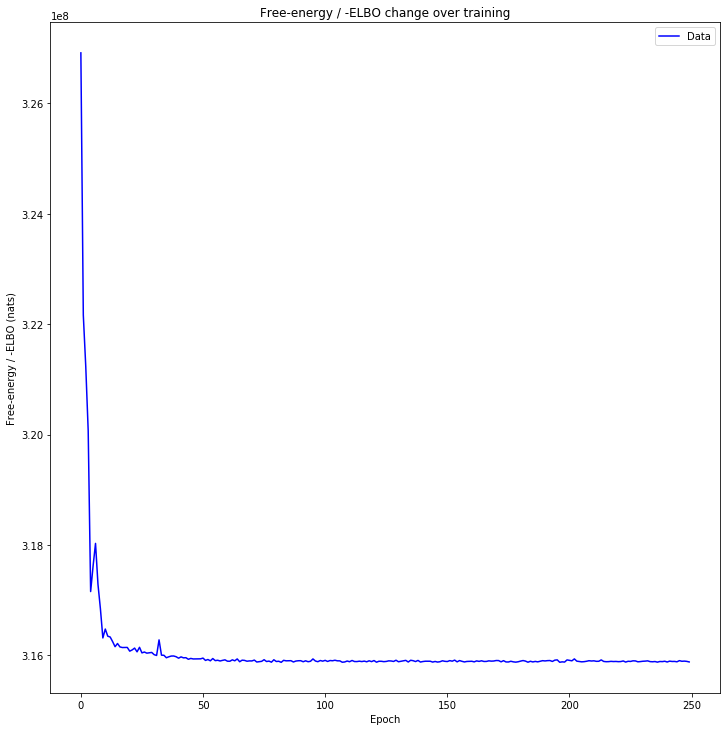

In [8]:
utils.plot_losses(losses)

In [10]:
losses = htfa.train(num_steps=250, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=9, checkpoint_steps=200,
                    blocks_filter=synthetic_db.inference_filter(training=False,held_out_tasks=['rest_1', 'rest_2', 'rest_3',
                                                                                                     'rest_4', 'rest_5', 'rest_6', 
                                                                                                     'rest_7', 'rest_8','rest_9']))

05/30/2020 22:41:07 [Epoch 1] (69ms) Posterior free-energy 4.62259000e+07
05/30/2020 22:41:07 Saving checkpoint...
05/30/2020 22:41:07 [Epoch 2] (67ms) Posterior free-energy 4.65092640e+07
05/30/2020 22:41:07 [Epoch 3] (66ms) Posterior free-energy 4.62869040e+07
05/30/2020 22:41:07 [Epoch 4] (67ms) Posterior free-energy 4.54303800e+07
05/30/2020 22:41:07 [Epoch 5] (66ms) Posterior free-energy 4.57138840e+07
05/30/2020 22:41:07 [Epoch 6] (59ms) Posterior free-energy 4.53728440e+07
05/30/2020 22:41:07 [Epoch 7] (63ms) Posterior free-energy 4.53256880e+07
05/30/2020 22:41:07 [Epoch 8] (63ms) Posterior free-energy 4.59953080e+07
05/30/2020 22:41:08 [Epoch 9] (65ms) Posterior free-energy 4.52404360e+07
05/30/2020 22:41:08 [Epoch 10] (68ms) Posterior free-energy 4.55012320e+07
05/30/2020 22:41:08 [Epoch 11] (61ms) Posterior free-energy 4.52145640e+07
05/30/2020 22:41:08 [Epoch 12] (67ms) Posterior free-energy 4.52116360e+07
05/30/2020 22:41:08 [Epoch 13] (67ms) Posterior free-energy 4.531384

05/30/2020 22:41:14 [Epoch 110] (73ms) Posterior free-energy 4.51094600e+07
05/30/2020 22:41:14 [Epoch 111] (65ms) Posterior free-energy 4.51146880e+07
05/30/2020 22:41:14 [Epoch 112] (64ms) Posterior free-energy 4.51116080e+07
05/30/2020 22:41:15 [Epoch 113] (74ms) Posterior free-energy 4.51186000e+07
05/30/2020 22:41:15 [Epoch 114] (74ms) Posterior free-energy 4.51117800e+07
05/30/2020 22:41:15 [Epoch 115] (66ms) Posterior free-energy 4.51090280e+07
05/30/2020 22:41:15 [Epoch 116] (68ms) Posterior free-energy 4.51211960e+07
05/30/2020 22:41:15 [Epoch 117] (68ms) Posterior free-energy 4.51090760e+07
05/30/2020 22:41:15 [Epoch 118] (66ms) Posterior free-energy 4.51140480e+07
05/30/2020 22:41:15 [Epoch 119] (61ms) Posterior free-energy 4.51121640e+07
05/30/2020 22:41:15 [Epoch 120] (64ms) Posterior free-energy 4.51178000e+07
05/30/2020 22:41:15 [Epoch 121] (66ms) Posterior free-energy 4.51102680e+07
05/30/2020 22:41:15 [Epoch 122] (66ms) Posterior free-energy 4.51189320e+07
05/30/2020 2

05/30/2020 22:41:22 [Epoch 218] (65ms) Posterior free-energy 4.51144120e+07
05/30/2020 22:41:22 [Epoch 219] (66ms) Posterior free-energy 4.51155640e+07
05/30/2020 22:41:22 [Epoch 220] (65ms) Posterior free-energy 4.51193640e+07
05/30/2020 22:41:22 [Epoch 221] (63ms) Posterior free-energy 4.51138000e+07
05/30/2020 22:41:22 [Epoch 222] (65ms) Posterior free-energy 4.51141040e+07
05/30/2020 22:41:22 [Epoch 223] (64ms) Posterior free-energy 4.51102800e+07
05/30/2020 22:41:22 [Epoch 224] (65ms) Posterior free-energy 4.51087800e+07
05/30/2020 22:41:22 [Epoch 225] (66ms) Posterior free-energy 4.51107480e+07
05/30/2020 22:41:22 [Epoch 226] (65ms) Posterior free-energy 4.51136520e+07
05/30/2020 22:41:22 [Epoch 227] (67ms) Posterior free-energy 4.51074600e+07
05/30/2020 22:41:22 [Epoch 228] (65ms) Posterior free-energy 4.51264560e+07
05/30/2020 22:41:22 [Epoch 229] (61ms) Posterior free-energy 4.51148440e+07
05/30/2020 22:41:22 [Epoch 230] (67ms) Posterior free-energy 4.51084440e+07
05/30/2020 2

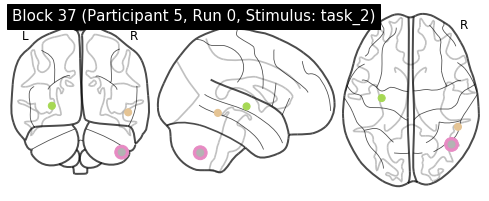

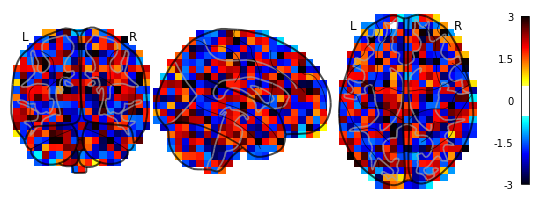

05/30/2020 22:41:43 Reconstruction Error (Frobenius Norm): 3.23913605e+02 out of 3.23877533e+02


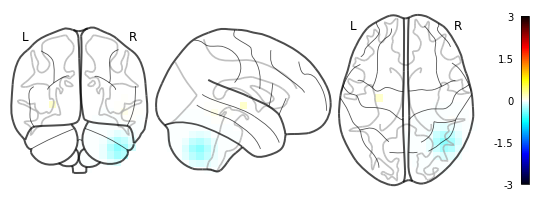

{'factors': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1892e-11, 1.7839e-10, 3.1755e-11,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.8021e-05, 8.1340e-07, 1.8809e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]), 'factor_centers': tensor([[-29.7973, -14.1494,  -0.2726],
        [ 50.4558, -44.3633,  -7.1139],
        [ 43.6890, -62.8972, -49.0547]]), 'factor_log_widths': tensor([0.3538, 3.3627, 5.2542]), 'weights': tensor([[ 1.6759e-01,  7.1829e-02, -3.4959e-01],
        [ 7.6995e-02,  3.4110e-01, -2.1028e-01],
        [-4.1729e-01, -3.1374e-03, -2.6539e-01],
        [ 1.1250e+00,  2.1053e+00, -4.7187e-02],
        [ 2.6755e-01,  1.1879e-01,  2.2571e-01],
        [ 5.4172e-01, -1.8833e-01, -1.3443e-01],
        [-6.6965e-01, -3.5275e+00, -2.2089e-02],
        [-6.1833e-01,  5.3857e-01, -2.6508e-01],
        [ 1.1786e+00,  1.0363e+00, -5.9784e-01],
        [-2.2469e-01,  6.8564e-01, -2.7219e-01],

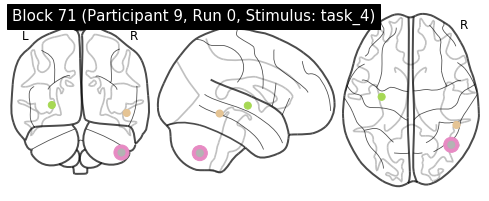

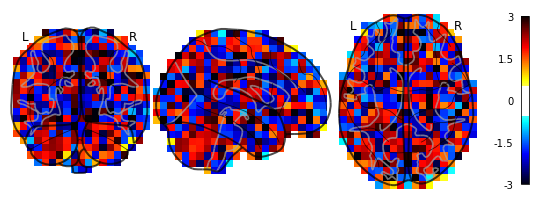

05/30/2020 22:41:46 Reconstruction Error (Frobenius Norm): 3.23424805e+02 out of 3.23421143e+02


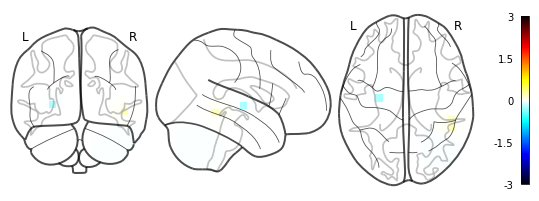

{'factors': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.9098e-12, 2.5124e-11, 3.6241e-12,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.2334e-05, 5.9094e-06, 2.4149e-07,  ..., 6.8173e-42, 8.9683e-44,
         0.0000e+00]]), 'factor_centers': tensor([[-29.8244, -12.8432,   0.5598],
        [ 48.8951, -42.4594,  -7.7854],
        [ 43.4434, -63.3247, -49.4179]]), 'factor_log_widths': tensor([2.5642, 3.4430, 5.4261]), 'weights': tensor([[-2.7530e-01,  2.9506e-01, -5.9868e-04],
        [ 9.1918e-01,  6.5860e-01, -4.7631e-02],
        [ 2.4558e-01, -6.3677e-01,  4.2218e-01],
        [-9.5595e-01, -1.2112e+00,  1.0937e-01],
        [ 1.2569e+00, -1.1394e+00,  2.2164e-01],
        [ 1.9682e+00,  9.5474e-01,  3.4059e-01],
        [-8.8247e-01, -4.1893e-01,  2.7773e-02],
        [-8.5475e-01,  6.0269e-01, -2.2706e-01],
        [-5.8715e-01,  8.7847e-01,  3.4833e-01],
        [-3.2969e-01, -1.4575e-01, -5.6269e-02],

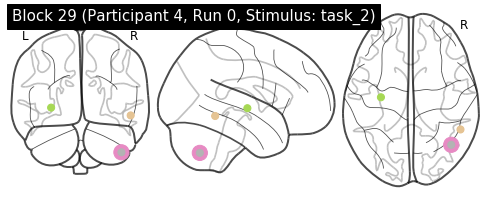

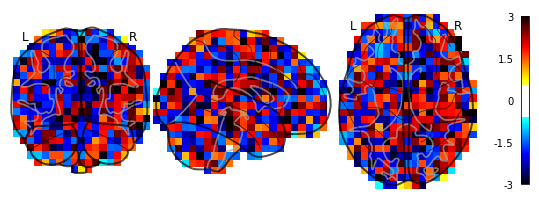

05/30/2020 22:41:48 Reconstruction Error (Frobenius Norm): 3.24059082e+02 out of 3.23971436e+02


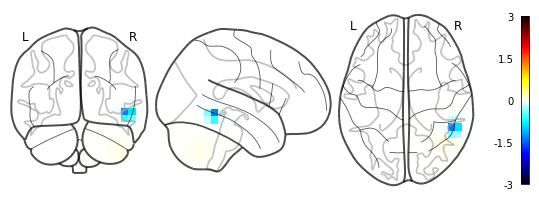

{'factors': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.9811e-07, 6.3448e-07, 3.2034e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0286e-04, 7.8652e-06, 3.4598e-07,  ..., 4.5759e-41, 6.6562e-43,
         5.6052e-45]]), 'factor_centers': tensor([[-30.5667, -13.2919,  -2.1921],
        [ 53.1233, -47.1664, -10.3849],
        [ 43.3882, -63.3035, -49.1950]]), 'factor_log_widths': tensor([-0.7706,  3.5326,  5.4445]), 'weights': tensor([[-0.6093, -2.1627,  0.0722],
        [ 0.3723, -0.1738, -0.1212],
        [ 1.4239, -0.5248,  0.0866],
        [-0.8811,  1.2354, -0.0385],
        [-0.7735,  0.9657, -0.2255],
        [-0.5613, -0.3709, -0.1043],
        [-1.8208, -2.1127,  0.0428],
        [ 1.4997,  1.4017,  0.0273],
        [ 0.0160, -1.6866,  0.2807],
        [-0.6026, -2.7155,  0.0551],
        [-0.4497,  1.9725, -0.1213],
        [-0.2169,  1.7388, -0.0086],
        [ 0.6991,  0.2329, -0.0396],
     

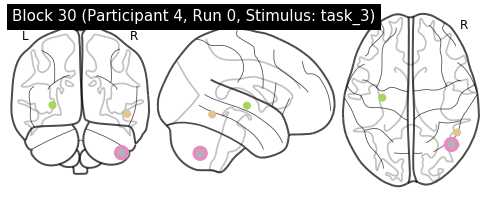

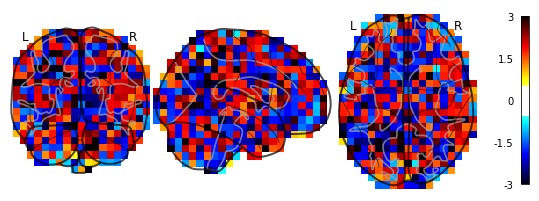

05/30/2020 22:41:51 Reconstruction Error (Frobenius Norm): 3.23624878e+02 out of 3.23540100e+02


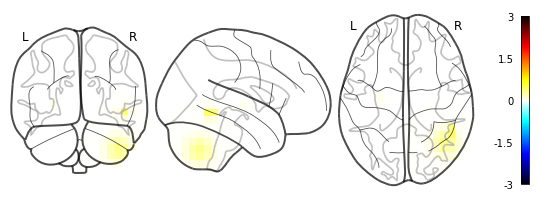

{'factors': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.4930e-09, 2.3896e-08, 2.7199e-09,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.6983e-05, 1.3925e-06, 3.8261e-08,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]), 'factor_centers': tensor([[-29.1130, -13.7173,   0.5142],
        [ 49.4492, -50.3648,  -8.7717],
        [ 43.5671, -62.9389, -49.6186]]), 'factor_log_widths': tensor([2.1098, 3.5591, 5.3135]), 'weights': tensor([[ 0.0742,  0.6388,  0.3618],
        [-0.9997,  0.2003,  0.0148],
        [-1.5823,  0.8447, -0.1139],
        [-0.0830, -0.0639,  0.1279],
        [ 0.9827,  0.5431,  0.1645],
        [ 1.6710, -2.9341, -0.3494],
        [-0.8929, -0.6652,  0.0301],
        [ 0.8880, -0.3122, -0.1127],
        [ 0.0288,  0.7358,  0.1299],
        [-0.3838, -0.9070, -0.1459],
        [ 0.3688, -0.3386,  0.0670],
        [ 0.2322,  0.1127,  0.0145],
        [ 0.7169, -0.9253,  0.0735],
        

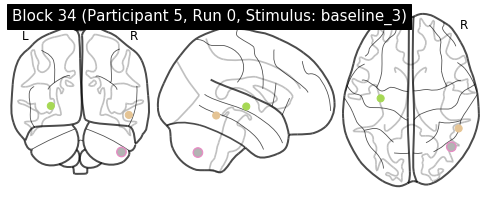

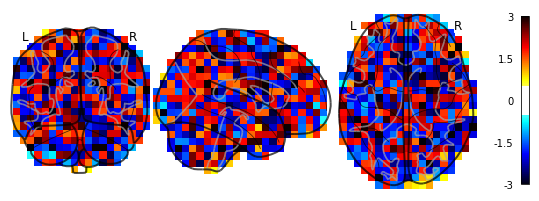

05/30/2020 22:41:54 Reconstruction Error (Frobenius Norm): 3.18249176e+02 out of 3.18241028e+02


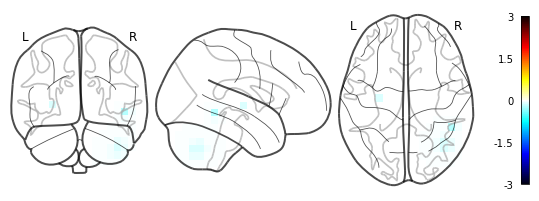

{'factors': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.1841e-14, 1.7652e-13, 1.6236e-15,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.5254e-10, 3.0205e-13, 1.5477e-16,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]), 'factor_centers': tensor([[-30.8769, -14.4435,  -0.3719],
        [ 51.1721, -46.0875,  -9.8596],
        [ 43.4478, -65.3397, -48.8364]]), 'factor_log_widths': tensor([-0.5155,  2.9955,  4.5506]), 'weights': tensor([[-0.7242, -0.2947, -0.1248],
        [ 0.7304,  0.2652, -0.1754],
        [-0.7669,  0.0814,  0.1030],
        [ 0.1211, -0.7022, -0.1754],
        [-0.8502,  1.1940,  0.3591],
        [-0.6633,  0.8358, -0.6035],
        [-0.7641,  0.8449, -0.3557],
        [ 0.7152, -0.2454,  0.2527],
        [ 0.7241,  0.1343,  0.0727],
        [ 0.7706,  0.1235, -0.2085],
        [-0.7028,  0.3920,  0.2165],
        [-0.8091, -0.3886, -0.3886],
        [ 0.6718, -1.2220, -0.1326],
     

In [11]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_factor_centers(b)
    htfa.plot_original_brain(b)
    htfa.plot_reconstruction(b)
    print(htfa.results(b))

In [12]:
def task_rest_labeler(task):
    if 'rest' in str(task):
        return 'Rest'
    else:
        return 'Task %s' % task

In [13]:
def group_labeler(subject):
    if subject <= 3:
        return 'Group 1'
    elif subject <= 6:
        return 'Group 2'
    else:
        return 'Group 3'

In [14]:
htfa.average_reconstruction_error(weighted=False)

05/30/2020 22:41:55 Average reconstruction error (MSE): 3.21052451e+02 +/- 2.45011829e+00
05/30/2020 22:41:55 Average data norm (Euclidean): 3.21159749e+02 +/- 2.45666238e+00
05/30/2020 22:41:55 Percent average reconstruction error: 99.966611 +/- 3.83432082e-02


(array([318.23034668, 318.53414917, 317.36413574, 318.71157837,
        323.89117432, 323.25137329, 323.71612549, 322.37802124,
        318.88092041, 319.18307495, 317.89541626, 317.14199829,
        323.79376221, 322.75375366, 323.65704346, 323.17755127,
        319.0166626 , 318.65859985, 319.09274292, 318.04299927,
        322.80194092, 322.89172363, 324.86099243, 320.87011719,
        319.21292114, 318.59912109, 318.42233276, 319.00823975,
        323.95913696, 323.89657593, 323.46176147, 321.93136597,
        319.37875366, 318.86676025, 318.18682861, 319.80862427,
        324.35122681, 323.77764893, 323.86004639, 322.24551392,
        319.30151367, 319.79962158, 317.1078186 , 319.23245239,
        322.46429443, 323.39199829, 323.75109863, 322.60769653,
        319.9039917 , 317.44799805, 319.09573364, 319.42965698,
        324.32974243, 323.39276123, 324.30352783, 322.24938965,
        319.58703613, 320.25704956, 319.43673706, 319.34954834,
        323.4760437 , 322.29003906, 323.

In [15]:
htfa.free_energy(num_particles=1, batch_size=300, use_cuda=True, blocks_batch_size=20,
                 blocks_filter=synthetic_db.inference_filter(training=False,held_out_tasks=['rest_1', 'rest_2', 'rest_3',
                                                                                                     'rest_4', 'rest_5', 'rest_6', 
                                                                                                     'rest_7', 'rest_8','rest_9']))

[[45112592.0, -45087404.0, 25185.78515625],
 [45122960.0, -45083060.0, 25432.552734375]]

In [16]:
htfa.free_energy(num_particles=1, batch_size=300, use_cuda=True, blocks_batch_size=20,
                 blocks_filter=synthetic_db.inference_filter(training=True,held_out_tasks=['rest_1', 'rest_2', 'rest_3',
                                                                                                     'rest_4', 'rest_5', 'rest_6', 
                                                                                                     'rest_7', 'rest_8','rest_9']))

[[315972960.0, -315860512.0, 112504.078125],
 [316000960.0, -315836640.0, 113659.5234375]]